In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

white_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delimiter=";")
white_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


# Correlation

To fit the data with a linear model regression, it is a good practice to employ variables presenting a high correlation with the target. One way to do this is by calculating correlation coefficients and another way is through visual methods.

We will predict the density for red wines, so we import the data and then inspect the dataset.


In [8]:
correlations = white_df.corr()['density'].drop(['quality'])
print(correlations)

fixed acidity           0.265331
volatile acidity        0.027114
citric acid             0.149503
residual sugar          0.838966
chlorides               0.257211
free sulfur dioxide     0.294210
total sulfur dioxide    0.529881
density                 1.000000
pH                     -0.093591
sulphates               0.074493
alcohol                -0.780138
Name: density, dtype: float64


In [14]:
# Another way is making an interactive graph with ipywidgets that allows us to visualize the different correlations.
import ipywidgets as widgets
from IPython.display import display

Predictor_Var = list(white_df.columns)

def CorrVis(Predictor_Var):
  plt.scatter(white_df['density'],white_df[Predictor_Var])
  plt.xlabel('Density')
  plt.ylabel(Predictor_Var)
  print('Corr Coef = ', np.corrcoef(white_df['density'],white_df[Predictor_Var])[0,1])

widgets.interactive(CorrVis, Predictor_Var = list(white_df.columns))

interactive(children=(Dropdown(description='Predictor_Var', options=('fixed acidity', 'volatile acidity', 'cit…

# Linear Regression

In this section, we will perform a linear regression using alcohol as the predictor variable ($x_i$) and density as the target ($y_i$), according to the model:

$
y_i = β_1 x_i + β_0
$

We will split the data into training and test sets, which is commonly done in machine learning methods for validation of the model created. For more information, please visit the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html 'sklearn.model_selection.train_test_split').

In [16]:
from sklearn.model_selection import train_test_split

X = white_df[['alcohol']]
y = white_df['density']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
# We first import the library to perform the linear regression and define which is the predictor variable and the target
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X = X_train, y = y_train)

LinearRegression()

In [20]:
# Let's print the parameters of the linear regression.
print('β1 = ' + str(linear_regression.coef_) + ', β0 = ' + str(linear_regression.intercept_))

β1 = [-0.00190561], β0 = 1.01408716780891


We can quantify how good the adjustment was by using the $R^2$ parameter. For more information, please visit the [documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics 'Regression metrics')

$
R^2 =1- \frac{\sum{ (y_i-\hat{y})^2}}{\sum{(y_i-\overline{y})^2}}
$

The adjustments usually are better on the training sets than the test sets, but in this case, we will find that the training set has some outliers that make this adjustment for the training set worse.

In [22]:
from sklearn.metrics import r2_score
y_pred_test = linear_regression.predict(X_test)
y_pred_train = linear_regression.predict(X_train)

print('R2 train = ', r2_score(y_train, y_pred_train))
print('R2 test = ', r2_score(y_test, y_pred_test))

R2 train =  0.59265087229245
R2 test =  0.644777803115205


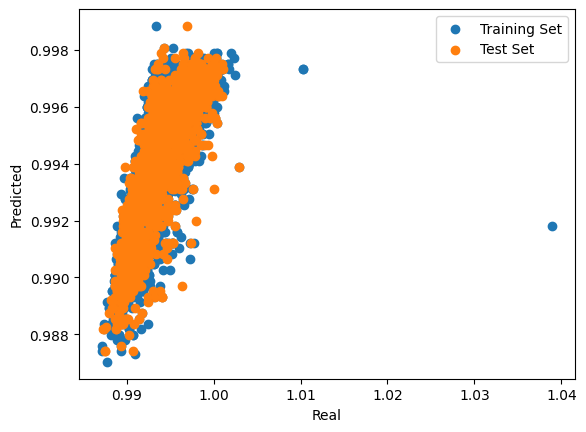

In [23]:
# One way to visualize how good the adjustment was is to plot the predicted value against the actual value.
plt.scatter(y_train,y_pred_train, label='Training Set')
plt.scatter(y_test,y_pred_test, label='Test Set')
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.legend()

# Multiple Linear Regression

Multiple linear regression (MLR) is a generalization of classical linear regression. MLR models a linear relationship between the target response and multiple explanatory variables.

$y_i =β_0​	 +β_1	 x_{i1}​	 + β_2 x_{i2}​	 +...+ β_p​	 x_{ip}​
$

In [25]:
from sklearn.model_selection import train_test_split

X = white_df.drop(['quality', 'density'], axis=1)
y = white_df['density']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
# Since MLR is a generalization, the Scikit Learn library uses the same function that we used before.
from sklearn.linear_model import LinearRegression

multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(X = X_train, y = y_train)

LinearRegression()

Increasing the number of predictor variables leads to a better adjustment of the target so that the value of $R^2$ increases.

In [27]:

from sklearn.metrics import r2_score

pred_train_lr = multiple_linear_regression.predict(X_train)
pred_test_lr = multiple_linear_regression.predict(X_test)

print('R2 training = ', r2_score(y_train, pred_train_lr))
print('R2 test = ', r2_score(y_test, pred_test_lr))

R2 training =  0.9608334119853044
R2 test =  0.9724221101555639


Another useful metric is $RSME$. It has the advantage that it can be used for non-linear models. For more information, please visit the [documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics 'Regression metrics').

$
RMSE =\sqrt{ \frac{1}{n} \sum{(y_i - \hat{y})^2}}
$

In [28]:
from sklearn.metrics import mean_squared_error
rmse_test = np.sqrt(mean_squared_error(y_test,pred_test_lr))
print('RSME test= ', rmse_test)

RSME test=  0.00047624213322229874


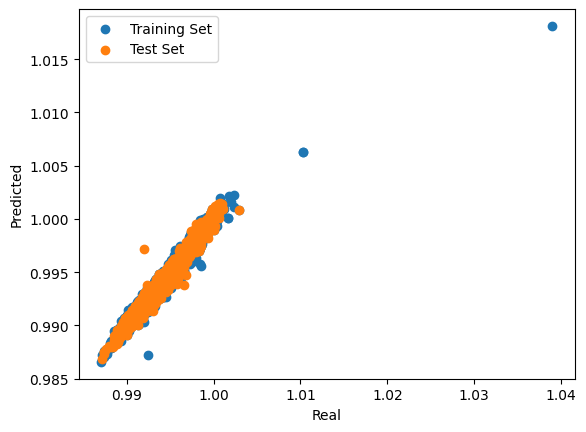

In [29]:
# Again we use graph to compare different test results
plt.scatter(y_train,pred_train_lr, label='Training Set')
plt.scatter(y_test,pred_test_lr, label='Test Set')

plt.xlabel('Real')
plt.ylabel('Predicted')
plt.legend()

In [30]:
# Let's analyze the coefficients of the MLR and pay attention to their magnitude. It seems difficult to conclude anything about their importance.
coefficients = pd.DataFrame(multiple_linear_regression.coef_,X.columns.tolist())
coefficients.columns = ['Coefficients']
print(coefficients)

                      Coefficients
fixed acidity             0.000784
volatile acidity          0.000808
citric acid               0.000347
residual sugar            0.000380
chlorides                 0.005043
free sulfur dioxide      -0.000007
total sulfur dioxide      0.000004
pH                        0.003579
sulphates                 0.001487
alcohol                  -0.001112


<Axes: >

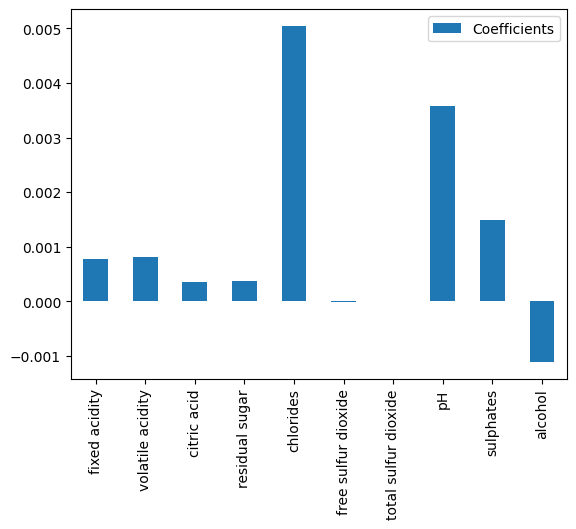

In [31]:
coefficients.plot.bar()

# Standardization

The standardization is a method to transform the different predictor variables into comparable ranges. Using standardized data, a higher coefficient indicates that it is a predictor variable that has more importance to predict the target.



In [33]:
from sklearn.model_selection import train_test_split

X = white_df.drop(['quality', 'density'], axis=1)
y = white_df['density']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
# Standardizing after splitting the dataset is a way to avoid bias.

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
from sklearn.linear_model import LinearRegression

multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(X = X_train, y = y_train)

LinearRegression()

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = multiple_linear_regression.predict(X_test)

rmse_MLR = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print('R2 test = ', r2)
print('RSME test = ', rmse_MLR)

R2 test =  0.9724221101555643
RSME test =  0.0004762421332222952


In [38]:
# As the data is standardized, we can analyze the coefficients and determine which are the most important predictor variables.
coefficients = pd.DataFrame(multiple_linear_regression.coef_,X.columns.tolist())
coefficients.columns = ['Coefficients']
print(coefficients)

                      Coefficients
fixed acidity             0.000664
volatile acidity          0.000082
citric acid               0.000042
residual sugar            0.001960
chlorides                 0.000108
free sulfur dioxide      -0.000123
total sulfur dioxide      0.000156
pH                        0.000538
sulphates                 0.000169
alcohol                  -0.001370


We can see that some variables are less important to generate the regression model. It is worth noticing that using only the alcohol, the residual sugar, the fixed acids, and the pH might make a better model since the other variables do not affect notably the prediction and introduce noise into the model.


<Axes: >

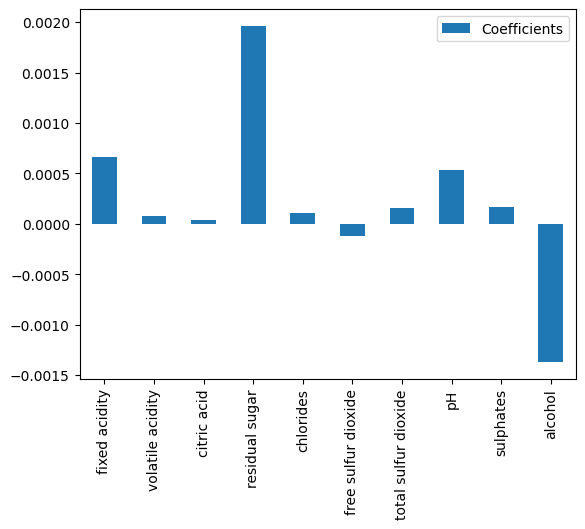

In [39]:
coefficients.plot.bar()

# LASSO (Least Absolute Shrinkage and Selection Operator)

Least Absolute Shrinkage and Selection Operator (LASSO) is a linear regression method that produces variable selection and regularization to improve the prediction accuracy and generate a smaller model. This method uses a cost function with a constant alpha that defines the degree of penalization.

$
LASSO_ {CostFunction}=\sum_{i=1}^M (y_i-\hat{y_i})^2=\sum_{i=1}^M (y_i-\sum_{j=0}^p w_j \times x_{ij})^2 + \alpha\sum_{j=0}^p |w_j| \\
For \; some \; t \, > \, 0, \, \sum_{j=0}^p |w_j|<t
$

**Scikit learn** has implemented LASSO in the function **sklearn.linear_model.Lasso**. For more information, please visit the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html 'sklearn.linear_model.Lasso').


In [40]:
from sklearn.linear_model import Lasso

lasso_regression = Lasso(alpha=0.0001)
lasso_regression.fit(X = X_train, y = y_train)

Lasso(alpha=0.0001)

In [41]:
from sklearn.metrics import r2_score, mean_squared_error
y_pred = lasso_regression.predict(X_test)


r2 = r2_score(y_test, y_pred)
print('R2 test = ', r2)

R2 test =  0.9680058702120279


In [42]:
# Let's analyze if using LASSO we have a smaller model where some of the coefficients are zero.
coeffecients = pd.DataFrame(lasso_regression.coef_,X.columns.tolist())
coeffecients.columns = ['Coeffecient']
print(coeffecients)

                      Coeffecient
fixed acidity            0.000518
volatile acidity         0.000000
citric acid              0.000000
residual sugar           0.001855
chlorides                0.000027
free sulfur dioxide     -0.000000
total sulfur dioxide     0.000090
pH                       0.000345
sulphates                0.000096
alcohol                 -0.001337


<Axes: >

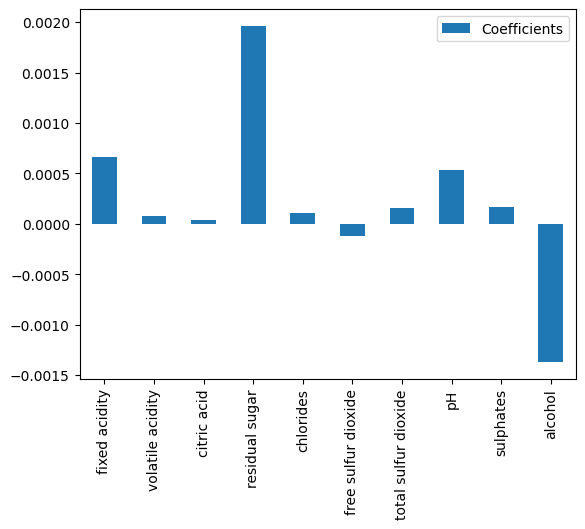

In [43]:
coefficients.plot.bar()

Finally, we will analyze how the RSME of the training and test sets change for different alpha values.

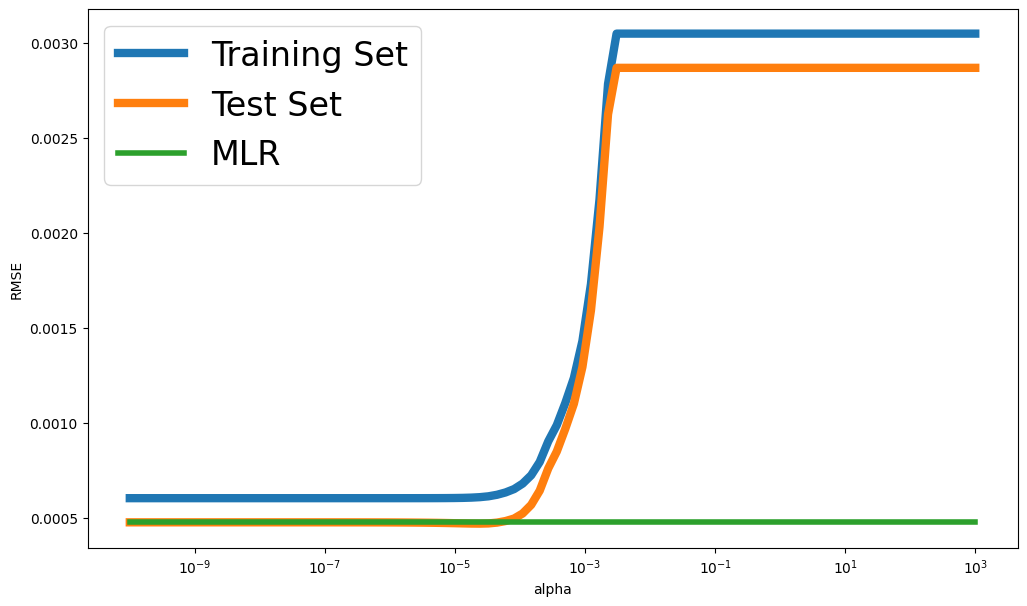

In [44]:
alphas=np.logspace(-10,3,endpoint=True,num=100,base=10)
RMSE=[]
RMSE_p=[]
for x in (alphas):
    #print(x)
    model_lasso = Lasso(x)
    model_lasso.fit(X_train, y_train)
    pred_test_lasso= model_lasso.predict(X_test)
    pred_train_lasso=model_lasso.predict(X_train)
    RMSE_p.append(np.sqrt(mean_squared_error(y_test,pred_test_lasso)))
    RMSE.append(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))

fig=plt.gcf()
fig.set_size_inches(12,7)

plt.plot(alphas,RMSE, label='Training Set', linewidth=6)
plt.plot(alphas,RMSE_p, label='Test Set',linewidth=6)
plt.plot(alphas,len(alphas)*[rmse_MLR], label='MLR',linewidth=4)
plt.xscale("log")
plt.xlabel('alpha')
plt.ylabel('RMSE')

plt.rc('font', size=26)          # controls default text sizes
plt.rc('axes', titlesize=26)     # fontsize of the axes title
plt.rc('axes', labelsize=26)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=26)    # fontsize of the tick labels
plt.rc('ytick', labelsize=26)    # fontsize of the tick labels
plt.rc('legend', fontsize=24)    # legend fontsize
plt.rc('figure', titlesize=18)  # fontsize of the figure title

plt.legend()

We can also make an advanced graph using ipywidgets that allow us to change the coefficients according to the value of alpha.


In [50]:
import ipywidgets as widgets

from IPython.display import display
from sklearn import preprocessing


data_lasso = white_df.copy()
data_lasso = data_lasso.drop(labels = ['quality','density'],axis = 1)
features = data_lasso.columns.tolist()
data_lasso = preprocessing.StandardScaler().fit_transform(data_lasso)
y_lasso = white_df['density']

def Lassovis(alpha):
    lasso_regression = Lasso((alpha))
    lasso_regression.fit(X = data_lasso, y = y_lasso)

    plt.figure(figsize=(5, 5))
    plt.subplot(211)
    pred_test_lasso=lasso_regression.predict(X_test)
    plt.scatter(y_test,pred_test_lasso)
    plt.xlabel('y_test')
    plt.ylabel('pred_test_lasso')

    plt.subplot(212)
    plt.bar(features,lasso_regression.coef_)
    plt.xticks(rotation=90)

widgets.interact(Lassovis,alpha=widgets.FloatLogSlider(name='Alpha', base=10, min=-5, max=-2, step=0.25, value=0.001));

interactive(children=(FloatLogSlider(value=0.001, description='alpha', max=-2.0, min=-5.0, step=0.25), Output(…

# Assignment

## Prediction Of Density

The objective of this exercise is to generate a prediction of red wine density using multiple linear regression and Ridge regression. The Ridge regression is a regularized linear regression. This method uses a cost function with a constant alpha that defines the penalization.

$
Ridge\;Regression_{CostFunction}=\sum_{i=1}^M (y_i-\hat{y_i})^2=\sum_{i=1}^M (y_i-\sum_{j=0}^p w_j \times x_{ij})^2 + \alpha\sum_{j=0}^p w_j^2 \\
For \; some \; c \, > \, 0, \, \sum_{j=0}^p w_j^2<c
$

**Scikit learn** has implemented Ridge Regression in the function **sklearn.linear_model.Ridge**. For more information, please visit the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html 'sklearn.linear_model.Ridge').

The steps to follow are:

- Divide the data into training and test sets.
- Standardize the training and testing sets.
- Make a multiple linear regression for predicting the density.
- Determine the $R^2$ and $RSME$ from MLR.
- Determine the coefficients from MLR.
- Make different Ridge Regression varying the alpha for predicting the density.
- Plot $RSME$ vs alpha for MLR and RR.


In [52]:
white_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [53]:
from sklearn.model_selection import train_test_split

X = white_df.drop(['quality', 'density'], axis=1)
y = white_df['density']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [54]:
# Standardise the dataset and training set
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
X_train

array([[-1.49330341,  0.00887785,  0.5494557 , ...,  0.13483547,
        -0.52368369,  1.28829071],
       [ 1.69849482,  1.29249418,  1.46103085, ..., -1.12839094,
         0.53324035,  0.71998866],
       [-1.84794766,  0.305097  ,  0.38371477, ...,  0.99914828,
        -0.25945268,  0.96354668],
       ...,
       [ 0.87099157, -0.08986187,  1.54390132, ..., -1.12839094,
         0.35708635,  0.71998866],
       [-0.66580017, -0.38608103, -0.36211944, ..., -0.13110693,
        -0.96406871,  0.0705006 ],
       [ 1.46206532, -0.08986187,  0.13510336, ...,  0.20132107,
         1.23785638, -0.09187142]])

In [56]:
X_test

array([[-1.02044442,  0.10761757,  0.63232617, ..., -0.66299173,
         0.88554837,  0.36818263],
       [-1.72973291,  2.4773708 , -1.43943553, ...,  0.06834987,
         0.35708635,  2.18133679],
       [ 0.27991783, -0.28734131,  0.46658523, ...,  0.60023468,
        -0.52368369,  1.36947672],
       ...,
       [ 0.04348833, -0.97851933,  0.38371477, ..., -0.59650613,
        -0.61176069, -0.01068541],
       [ 0.87099157,  0.305097  , -0.77647178, ..., -0.92893414,
        -0.43560669,  1.04473269],
       [-0.31115592, -0.08986187, -0.36211944, ...,  0.79969148,
         2.64708844, -0.57898746]])

In [57]:
# Make Multiple Linear Regression (MLR) for density prediction
from sklearn.linear_model import LinearRegression

multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(X = X_train, y = y_train)

LinearRegression()

In [58]:
# Determine the 𝑅2 and 𝑅𝑆𝑀𝐸 from MLR
from sklearn.metrics import r2_score, mean_squared_error

pred_train_lr = multiple_linear_regression.predict(X_train)
pred_test_lr = multiple_linear_regression.predict(X_test)

r2 = r2_score(y_test, pred_test_lr)
print('R2 train = ', r2_score(y_train, pred_train_lr))
print('R2 test = ', r2_score(y_test, pred_test_lr))

rmse = np.sqrt(mean_squared_error(y_test,pred_test_lr ))
print('RSME test = ', rmse)


R2 train =  0.9608334119853045
R2 test =  0.9724221101555643
RSME test =  0.0004762421332222952


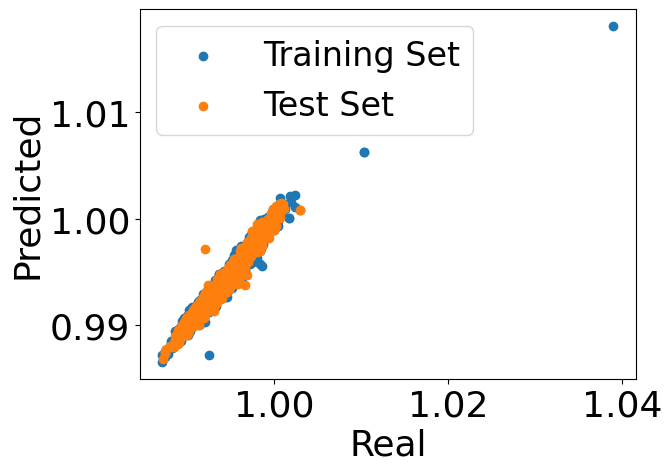

In [59]:
plt.scatter(y_train,pred_train_lr, label='Training Set')
plt.scatter(y_test,pred_test_lr, label='Test Set')

plt.xlabel('Real')
plt.ylabel('Predicted')
plt.legend()

In [61]:
# Determine the coefficients from multiple linear regression (MLR).
coeffecients = pd.DataFrame(multiple_linear_regression.coef_,X.columns.tolist())
coeffecients.columns = ['Coeffecient']
print(coeffecients)

                      Coeffecient
fixed acidity            0.000664
volatile acidity         0.000082
citric acid              0.000042
residual sugar           0.001960
chlorides                0.000108
free sulfur dioxide     -0.000123
total sulfur dioxide     0.000156
pH                       0.000538
sulphates                0.000169
alcohol                 -0.001370


<Axes: >

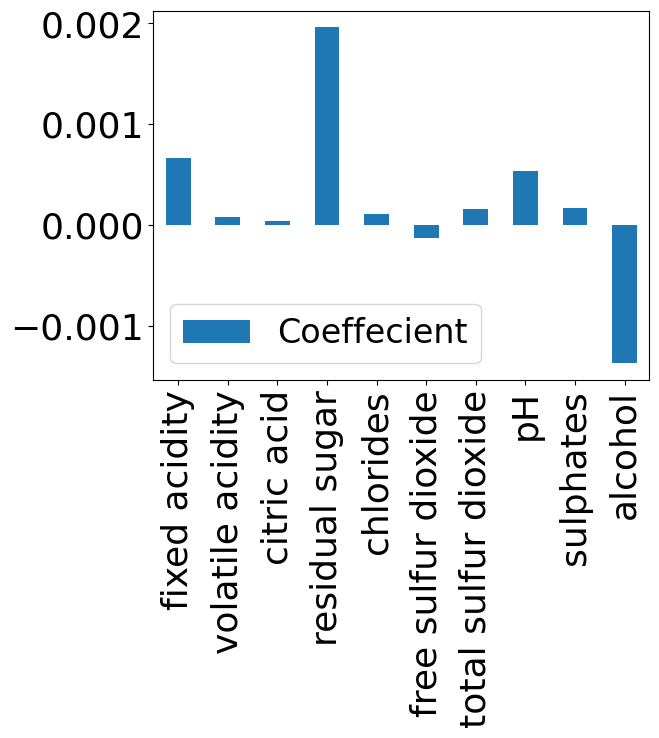

In [62]:
coeffecients.plot.bar()

Try different Ridge Regression analysis varying the value of alpha for predicting the density and plot 𝑅𝑆𝑀𝐸 vs alpha for MLR and RR.

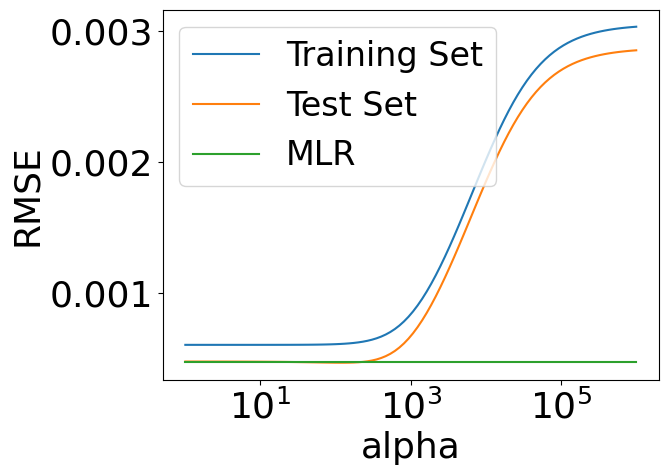

In [63]:
from sklearn.linear_model import Ridge

alphas=np.logspace(0,6,endpoint=True,num=100,base=10)
RMSE=[]
RMSE_p=[]
for x in (alphas):
    #print(x)
    ridge_regression = Ridge(x)
    ridge_regression.fit(X_train, y_train)
    pred_test_ridge= ridge_regression.predict(X_test)
    pred_train_ridge=ridge_regression.predict(X_train)
    RMSE_p.append(np.sqrt(mean_squared_error(y_test,pred_test_ridge)))
    RMSE.append(np.sqrt(mean_squared_error(y_train,pred_train_ridge)))

#print(RMSE)

plt.plot(alphas,RMSE, label='Training Set')
plt.plot(alphas,RMSE_p, label='Test Set')
plt.plot(alphas,len(alphas)*[rmse], label='MLR')
plt.xscale("log")
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.legend()

And now, let's we generate an interactive plot in which you can vary the alpha value and it returns a scatterplot of predicted versus actual acidity values and the coefficients for every feature of the Ridge regression.


In [64]:
import ipywidgets as widgets

from IPython.display import display
from sklearn import preprocessing


data_ridge = white_df.copy()
data_ridge = data_ridge.drop(labels = ['quality','density'],axis = 1)
features = data_ridge.columns.tolist()
data_ridge = preprocessing.StandardScaler().fit_transform(data_ridge)
y_ridge = white_df['density']

def Lassovis(alpha):
    ridge_regression = Ridge((alpha))
    ridge_regression.fit(X = data_ridge, y = y_ridge)

    plt.figure(figsize=(10, 6))
    plt.subplot(211)
    pred_test_ridge=ridge_regression.predict(X_test)
    plt.scatter(y_test,pred_test_ridge)
    plt.xlabel('y_test')
    plt.ylabel('pred_test_ridge')

    plt.subplot(212)
    plt.bar(features,ridge_regression.coef_)
    plt.xticks(rotation=90)


widgets.interact(Lassovis,alpha=widgets.FloatLogSlider(name='Alpha', base=10, min=0, max=6, step=0.5, value=0.001));

interactive(children=(FloatLogSlider(value=1.0, description='alpha', max=6.0, step=0.5), Output()), _dom_class…